In [15]:
!pip install polars

In [16]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [17]:
df = pl.scan_csv('data/Physical_Activity_Monitoring_unlabeled.csv')

In [18]:
df.head(10).collect()

timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
252.75,34.875,0.902847,7.45872,6.03249,1.0061,7.44575,6.30365,-0.021952,0.004114,-0.000752,-9.99538,7.2291,-32.1399,0.561813,-0.218644,0.359836,0.712095,36.625,-0.106754,1.66721,9.32797,-0.292054,1.56048,9.74926,-0.019807,-0.034096,0.003963,39.5466,5.5805,-27.966,0.987675,-0.081231,-0.009229,0.133472,34.125,-0.458486,-9.07442,-4.47955,-0.318531,-8.89907,-4.13847,0.0439539,-0.025606,0.0302387,-14.5447,27.3336,-5.7662,0.206416,0.348212,0.763201,-0.503652,5
3652.45,29.75,-4.06933,3.76168,8.27972,-5.9725,3.22273,6.90897,0.116054,-0.375968,-0.01289,40.4558,-1.19692,-37.5552,0.884964,-0.281047,-0.145657,0.341518,34.6875,0.0697556,2.61466,-11.891,-0.139514,2.40386,-10.9686,0.299329,0.272314,0.249314,17.4295,2.61508,39.3298,0.155581,-0.908072,-0.388069,-0.024528,33.625,6.03534,2.78717,-2.05542,6.39719,4.93016,-1.31267,-0.319186,-0.670163,1.7862,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
504.76,34.375,-2.00754,-9.6018,0.773674,-1.8035,-9.58937,1.07368,0.0201311,0.0421891,-0.011507,7.26741,24.4379,-14.3005,0.535655,0.564385,0.371967,-0.506146,37.625,0.326521,9.81131,0.0163223,0.26123,9.78271,0.460448,0.009436,-0.015007,-0.037835,5.6352,-25.822,-3.77094,0.721119,-0.680477,0.0903025,0.0937211,33.9375,9.23875,2.80925,-2.56296,9.14233,2.91815,-2.12294,0.0656542,-0.009741,-0.006579,-18.8171,16.3089,25.2928,0.139776,0.676586,0.393796,0.606316,8
2801.61,31.9375,-13.2622,5.85443,0.899334,-13.6115,5.91511,0.840377,1.71563,-0.050492,-1.829,46.4822,-7.83916,-13.6242,0.648205,0.540984,-0.28256,-0.455332,36.5,2.12746,8.91873,-8.58292,2.37262,9.7302,-8.65023,0.0781086,-0.099471,0.488145,-1.19466,-38.6897,5.28249,0.367155,-0.663333,0.553109,0.345336,34.5625,13.54,3.08224,2.57328,18.0863,1.82221,2.91851,2.97001,-0.16347,-3.49557,-26.7418,34.3566,21.3274,0.416303,0.783387,0.306464,0.345075,2
441.01,33.5,-0.01394,8.6654,4.39821,0.144153,8.56816,4.8222,-0.006938,-0.007383,-0.032679,3.97764,-22.4232,-20.1775,0.769041,-0.442364,0.232331,0.398638,35.8125,0.648395,9.73894,0.603203,0.519639,9.79662,0.897193,0.003127,-0.015282,-0.06141,4.60037,-25.655,-3.63808,0.735751,-0.666812,0.086031,0.0814302,34.6875,9.55177,-0.494227,-2.77079,9.5455,-0.394571,-2.47767,0.0139526,-0.028172,-0.003737,-17.7798,-3.9981,10.995,0.171133,-0.748343,0.252988,-0.588807,6
2407.75,32.25,-11.2486,4.70549,1.47219,-10.4374,4.45819,1.59536,1.37628,1.62911,-2.77106,35.4523,-33.6593,-20.9605,0.199763,0.512604,-0.394729,-0.735881,36.625,0.672162,10.216,-1.2178,-0.353022,9.33357,-1.16931,0.477854,-0.374119,-0.030835,-5.3361,-39.8521,-12.5099,0.34798,-0.39305,0.601259,0.602419,34.9375,2.86347,-2.59514,-0.742501,3.8439,-1.37686,-0.749085,-2.16663,0.395789,-0.734158,-37.23,-17.6606,25.9766,0.0816376,-0.564666,-0.465628,-0.676519,6
288.18,33.8125,-9.00348,3.48025,2.20273,-8.78106,3.45025,2.42642,0.29149,-0.142762,-0.277982,46.0534,-0.5136,2.54593,0.755744,-0.325815,-0.516071,0.237417,37.1875,0.554952,9.41673,-2.53384,0.439262,9.43874,-2.11077,0.002726,-0.119148,-0.003113,-0.836677,-27.7545,30.0634,0.429579,-0.571943,-0.540254,-0.443248,34.625,9.64597,-1.22285,-1.95492,9.68513

In [19]:
df.describe()

statistic,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",534601.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,534601.0
"""null_count""",0.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,0.0
"""mean""",1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.21825,4.262513,-0.008852,0.028801,0.000015,20.396467,-10.372369,-24.587815,0.618039,-0.003404,-0.09793,-0.069672,35.869356,0.504332,7.646658,-0.187075,0.36348,7.654198,0.1419,0.004679,0.021363,-0.024228,7.013223,-26.329538,1.213141,0.601851,-0.383544,0.066474,0.072854,33.493061,8.604628,-0.67142,-2.718494,8.560964,-0.558241,-2.309876,0.017766,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
"""std""",1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,1.616437,23.942593,22.044342,17.658619,0.296602,0.357215,0.316885,0.536265,1.50464,1.536747,4.813007,5.358383,1.5292,4.825198,5.358863,0.3965,0.52551,0.303287,17.180325,19.731347,24.234586,0.302357,0.284891,0.433233,0.347375,1.083949,7.056299,7.803236,3.969057,6.456356,7.459842,3.410263,0.959369,0.61884,2.036102,19.303887,22.25317,17.907491,0.301254,0.5594,0.344271,0.466304,2.318076
"""min""",37.66,27.5,-114.755,-82.5509,-73.9497,-61.2147,-61.8242,-61.5771,-19.6905,-7.60901,-14.2647,-74.6,-199.52,-163.766,0.000003,-0.998944,-0.966679,-0.999186,32.0625,-39.2034,-17.0678,-37.7546,-34.204,-17.4628,-37.028,-4.47776,-4.92635,-3.97186,-49.9854,-122.343,-66.6847,0.00001,-0.995404,-0.998015,-0.85988,30.0,-82.9011,-141.035,-156.179,-58.4299,-61.8986,-62.2729,-10.0935,-7.70104,-14.0196,-172.865,-136.951,-102.716,0.000003,-0.954848,-0.876838,-0.99704,1.0
"""25%""",475.5,31.3125,-9.07636,0.682785,1.58878,-8.98107,0.68759,1.78016,-0.153181,-0.083315,-0.089234,4.85443,-23.6407,-37.4486,0.385056,-0.266248,-0.349762,-0.575945,34.6875,-0.144123,4.57612,-3.52392,-0.263469,4.55002,-3.1875,-0.058895,-0.057256,-0.077364,-4.54805,-38.3977,-13.9654,0.361107,-0.622015,-0.258381,-0.078236,32.75,5.05011,-3.3879,-4.01685,5.01853,-3.31337,-3.6003,-0.068055,-0.049003,-0.221902,-39.6899,-10.9608,2.2525,0.145024,-0.676391,0.006839,-0.580039,2.0
"""50%""",827.61,32.875,-5.46558,3.08921,4.15713,-5.43483,3.12716,4.41365,-0.004438,0.004013,-0.004642,22.2559,-12.8641,-24.5041,0.647128,0.0,-0.089283,0.0,35.9375,0.555578,9.19302,-0.258403,0.412374,9.14211,0.0920812,0.00277,0.000073,-0.017051,3.87517,-28.3385,-2

In [20]:
uniq_subject = df.select(
    pl.col('subject_id').n_unique()
).collect()
print(uniq_subject)

shape: (1, 1)
┌────────────┐
│ subject_id │
│ ---        │
│ u32        │
╞════════════╡
│ 8          │
└────────────┘


In [21]:
df_filled = df.with_columns(
    pl.all().fill_null(pl.all().mean().over('subject_id'))
)

df_filled.describe()


statistic,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1593.538159,32.451341,-4.436413,3.243565,4.080092,-4.376995,3.219992,4.263192,-0.008848,0.028776,0.000036,20.403611,-10.375186,-24.587614,0.618041,-0.003479,-0.098099,-0.069604,35.869593,0.504304,7.646683,-0.187115,0.363458,7.654223,0.141876,0.004679,0.021368,-0.024229,7.013021,-26.331148,1.213499,0.601866,-0.383512,0.066437,0.07281,33.493831,8.605074,-0.67171,-2.71845,8.561414,-0.558554,-2.309807,0.017752,-0.031927,0.002307,-28.752115,2.116196,14.72632,0.359981,-0.091075,0.303649,-0.173835,4.558615
"""std""",1243.906483,1.750354,7.035778,7.199773,3.816974,7.042704,6.842078,3.807796,1.155728,0.923328,1.610317,23.856172,21.969621,17.592464,0.295766,0.355912,0.315776,0.534343,1.503849,1.535598,4.809384,5.35461,1.528055,4.821565,5.355099,0.3962,0.525112,0.303058,17.167411,19.718113,24.21673,0.302211,0.284745,0.432928,0.347135,1.082701,7.039525,7.784818,3.960193,6.44102,7.44226,3.402879,0.957084,0.617366,2.031249,19.265923,22.202729,17.865967,0.300861,0.558135,0.343562,0.465307,2.318076
"""min""",37.66,27.5,-114.755,-82.5509,-73.9497,-61.2147,-61.8242,-61.5771,-19.6905,-7.60901,-14.2647,-74.6,-199.52,-163.766,0.000003,-0.998944,-0.966679,-0.999186,32.0625,-39.2034,-17.0678,-37.7546,-34.204,-17.4628,-37.028,-4.47776,-4.92635,-3.97186,-49.9854,-122.343,-66.6847,0.00001,-0.995404,-0.998015,-0.85988,30.0,-82.9011,-141.035,-156.179,-58.4299,-61.8986,-62.2729,-10.0935,-7.70104,-14.0196,-172.865,-136.951,-102.716,0.000003,-0.954848,-0.876838,-0.99704,1.0
"""25%""",475.5,31.3125,-9.06513,0.71226,1.61707,-8.96727,0.717536,1.80657,-0.148494,-0.080412,-0.085873,4.96908,-23.5406,-37.2477,0.387703,-0.262928,-0.347476,-0.573237,34.6875,-0.143365,4.5862,-3.51493,-0.262637,4.56302,-3.18245,-0.058675,-0.057001,-0.07706,-4.54052,-38.3924,-13.9513,0.361523,-0.621752,-0.25672,-0.076283,32.75,5.12444,-3.34978,-4.0111,5.08819,-3.28201,-3.58869,-0.06638,-0.04907,-0.211924,-39.6645,-10.8431,2.38584,0.145729,-0.674639,0.0071818,-0.579087,2.0
"""50%""",827.61,32.875,-5.38942,3.10302,4.1647,-5.3575,3.13882,4.4126,-0.004424,0.004291,-0.004447,22.167,-12.8369,-24.4661,0.643513,0.0,-0.09094,0.0,35.9375,0.554744,9.19143,-0.2553,0.412284,9.13753,0.0953732,0.002789,0.000159,-0.017109,3.89497,-28.3096,-1.96711,0.585417,-0.444694,0.0384071,0.093552,33.8125,9.37646,-0.483084,-2.54446,9.4063,-0.409101,-2.12275,0.00747,-0.004729,0.000451,-26.

In [22]:
df_filled = df_filled.with_columns(
    ((pl.col("handAcc16_1")**2 + pl.col("handAcc16_2")**2 + pl.col("handAcc16_3")**2)**0.5).alias("handAcc16")
).with_columns(
    ((pl.col("handAcc6_1")**2 + pl.col("handAcc6_2")**2 + pl.col("handAcc6_3")**2)**0.5).alias("handAcc6")
).with_columns(
    ((pl.col("handGyro1")**2 + pl.col("handGyro2")**2 + pl.col("handGyro3")**2)**0.5).alias("handGyro")
).with_columns(
    ((pl.col("handMagne1")**2 + pl.col("handMagne2")**2 + pl.col("handMagne3")**2)**0.5).alias("handMagne")
).with_columns(
    ((pl.col("handOrientation1")**2 + pl.col("handOrientation2")**2 + pl.col("handOrientation3")**2)**0.5).alias("handOrientation")
).with_columns(
    ((pl.col("chestAcc16_1")**2 + pl.col("chestAcc16_2")**2 + pl.col("chestAcc16_3")**2)**0.5).alias("handOrientation")
).with_columns(
    ((pl.col("chestAcc6_1")**2 + pl.col("chestAcc6_2")**2 + pl.col("chestAcc6_3")**2)**0.5).alias("chestAcc6")
).with_columns(
    ((pl.col("chestGyro1")**2 + pl.col("chestGyro2")**2 + pl.col("chestGyro3")**2)**0.5).alias("chestGyro")
).with_columns(
    ((pl.col("chestMagne1")**2 + pl.col("chestMagne2")**2 + pl.col("chestMagne3")**2)**0.5).alias("chestMagne")
).with_columns(
    ((pl.col("chestOrientation1")**2 + pl.col("chestOrientation2")**2 + pl.col("chestOrientation3")**2)**0.5).alias("chestOrientation")
).with_columns(
    ((pl.col("ankleAcc16_1")**2 + pl.col("ankleAcc16_2")**2 + pl.col("ankleAcc16_3")**2)**0.5).alias("ankleAcc16")
).with_columns(
    ((pl.col("ankleAcc6_1")**2 + pl.col("ankleAcc6_2")**2 + pl.col("ankleAcc6_3")**2)**0.5).alias("ankleAcc6")
).with_columns(
    ((pl.col("ankleGyro1")**2 + pl.col("ankleGyro2")**2 + pl.col("ankleGyro3")**2)**0.5).alias("ankleGyro")
).with_columns(
    ((pl.col("ankleMagne1")**2 + pl.col("ankleMagne2")**2 + pl.col("ankleMagne3")**2)**0.5).alias("ankleMagne")
).with_columns(
    ((pl.col("ankleOrientation1")**2 + pl.col("ankleOrientation2")**2 + pl.col("ankleOrientation3")**2)**0.5).alias("ankleOrientation")
).drop("handAcc16_1","handAcc16_2","handAcc16_3","handAcc6_1","handAcc6_2","handAcc6_3","handGyro1","handGyro2","handGyro3","handMagne1","handMagne2","handMagne3","handOrientation1","handOrientation2","handOrientation3",
       "chestAcc16_1","chestAcc16_2","chestAcc16_3","chestAcc6_1","chestAcc6_2","chestAcc6_3","chestGyro1","chestGyro2","chestGyro3","chestMagne1","chestMagne2","chestMagne3","chestOrientation1","chestOrientation2","chestOrientation3",
       "ankleAcc16_1","ankleAcc16_2","ankleAcc16_3","ankleAcc6_1","ankleAcc6_2","ankleAcc6_3","ankleGyro1","ankleGyro2","ankleGyro3","ankleMagne1","ankleMagne2","ankleMagne3","ankleOrientation1","ankleOrientation2","ankleOrientation3",
        'handTemperature', 'handOrientation4', 'chestTemperature', 'chestOrientation4', 'ankleTemperature', 'ankleOrientation4')

df_filled.describe()

statistic,timestamp,subject_id,handAcc16,handAcc6,handGyro,handMagne,handOrientation,chestAcc6,chestGyro,chestMagne,chestOrientation,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne,ankleOrientation
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1593.538159,4.558615,11.137382,11.190965,1.227208,48.002762,10.091224,10.088597,0.415722,42.648195,0.930531,12.230407,11.998622,1.275832,43.636276,0.859949
"""std""",1243.906483,2.318076,6.22225,5.777233,1.810035,13.620251,3.329911,3.34948,0.593971,13.967384,0.08768,7.625412,6.590257,1.948516,18.089514,0.103133
"""min""",37.66,1.0,0.418703,0.317664,0.000614,15.04628,0.121532,0.127027,0.000448,12.24347,0.510497,0.097642,0.080547,0.000589,4.723596,0.07689
"""25%""",475.5,2.0,9.60137,9.682409,0.046523,37.258029,9.485672,9.667714,0.049123,31.625833,0.884718,9.86995,9.824338,0.039853,31.789574,0.790105
"""50%""",827.61,5.0,9.772925,9.880451,0.356636,47.816058,9.770836,9.831616,0.196556,41.943068,0.976691,10.03703,9.876493,0.145186,42.962059,0.853959
"""75%""",2876.99,7.0,10.744657,10.780278,1.774665,54.870362,10.133013,10.050122,0.552336,48.682047,0.995707,11.275745,11.166992,1.825694,50.115818,0.960158
"""max""",4007.73,8.0,198.746004,93.128101,23.470033,207.448841,63.412393,57.611265,11.532051,125.807338,1.000001,225.797252,89.092226,15.399451,184.989082,1.000001


In [23]:
crop = df_filled.collect(streaming=True).to_pandas().groupby("subject_id").sample(frac=0.1, random_state=42)

print(crop["subject_id"].value_counts())


subject_id
5.0    7679
8.0    7305
6.0    7024
1.0    6988
2.0    6874
4.0    6374
7.0    6212
3.0    5004
Name: count, dtype: int64


In [24]:
crop.describe()

,timestamp,subject_id,handAcc16,handAcc6,handGyro,handMagne,handOrientation,chestAcc6,chestGyro,chestMagne,chestOrientation,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne,ankleOrientation
count,53460.00000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000
mean,1590.71922,4.558679,11.127849,11.177856,1.223245,47.999501,10.098333,10.091845,0.415353,42.610770,0.930555,12.162983,11.936467,1.260683,43.657479,0.860063
std,1243.45107,2.318109,6.187458,5.697813,1.799006,13.766917,3.324145,3.341398,0.594238,14.001818,0.087767,7.468043,6.457040,1.934709,18.259805,0.102954
min,38.06000,1.000000,0.516622,0.398713,0.001655,15.315088,0.272248,0.290155,0.000882,12.243470,0.541505,0.574481,0.080547,0.000589,4.723596,0.095801
25%,474.28000,2.000000,9.601450,9.681041,0.045988,37.222274,9.488049,9.668458,0.048923,31.526628,0.884312,9.867673,9.823783,0.039641,31.722536,0.790936
50%,825.38000,5.000000,9.771926,9.878993,0.358078,47.771416,9.773723,9.831704,0.193007,41.942898,0.977377,10.036470,9.875446,0.143882,42.877635,0.854101
75%,2876.68750,7.000000,10.723647,10.771508,1.781224,54.884632,10.134878,10.046835,0.549542,48.676746,0.995725,11.239422,11.126831,1.799817,50.144478,0.960095
max,4007.55000,8.000000,159.452654,88.225965,17.506398,207.448841,53.310397,57.611265,9.315767,125.762065,1.000000,207.293870,83.328136,12.522294,181.853495,1.000000


In [25]:
features = crop.drop(columns=['subject_id'])

corr_matrix = features.corr()

threshold = 0.9
to_drop = set()

for i, col1 in enumerate(features.columns):
    for j, col2 in enumerate(features.columns):
        if i < j and abs(corr_matrix.iloc[i, j]) > threshold:
            print(f'pair: 1={col1} and 2={col2} corr={abs(corr_matrix.iloc[i, j])}')
            to_drop.add(col2)

print(to_drop)

pair: 1=handAcc16 and 2=handAcc6 corr=0.9451558356934527
pair: 1=handOrientation and 2=chestAcc6 corr=0.9669221249957222
{'handAcc6', 'chestAcc6'}


In [26]:
features = features.drop(columns=to_drop)
features.describe()

,timestamp,handAcc16,handGyro,handMagne,handOrientation,chestGyro,chestMagne,chestOrientation,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne,ankleOrientation
count,53460.00000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000
mean,1590.71922,11.127849,1.223245,47.999501,10.098333,0.415353,42.610770,0.930555,12.162983,11.936467,1.260683,43.657479,0.860063
std,1243.45107,6.187458,1.799006,13.766917,3.324145,0.594238,14.001818,0.087767,7.468043,6.457040,1.934709,18.259805,0.102954
min,38.06000,0.516622,0.001655,15.315088,0.272248,0.000882,12.243470,0.541505,0.574481,0.080547,0.000589,4.723596,0.095801
25%,474.28000,9.601450,0.045988,37.222274,9.488049,0.048923,31.526628,0.884312,9.867673,9.823783,0.039641,31.722536,0.790936
50%,825.38000,9.771926,0.358078,47.771416,9.773723,0.193007,41.942898,0.977377,10.036470,9.875446,0.143882,42.877635,0.854101
75%,2876.68750,10.723647,1.781224,54.884632,10.134878,0.549542,48.676746,0.995725,11.239422,11.126831,1.799817,50.144478,0.960095
max,4007.55000,159.452654,17.506398,207.448841,53.310397,9.315767,125.762065,1.000000,207.293870,83.328136,12.522294,181.853495,1.000000


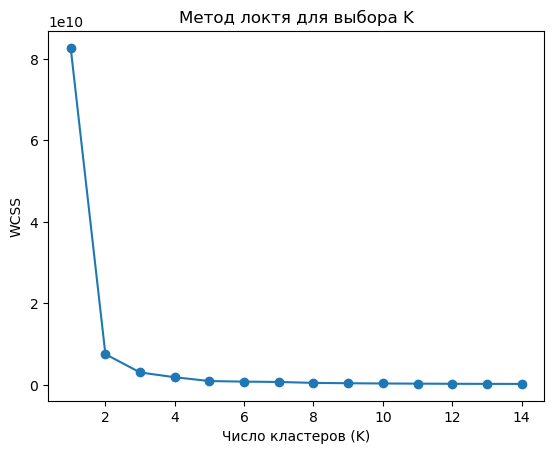

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Создадим вектор признаков
X = features

# Считаем WCSS для разных K
wcss = []
K_values = range(1, 15)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ -- сумма квадратов расстояний точек до центроидов

# Строим график
plt.plot(K_values, wcss, marker='o', linestyle='-')
plt.xlabel("Число кластеров (K)")
plt.ylabel("WCSS")
plt.title("Метод локтя для выбора K")
plt.show()

In [28]:
for i in [3,4,5]:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    clusters_kmean = kmeans.predict(X)

    score = silhouette_score(X, clusters_kmean)
    print(f'Score KMeans for K={i}: {score}')

Score KMeans for K=3: 0.7774898713945191
Score KMeans for K=4: 0.6507557274947835
Score KMeans for K=5: 0.6535277884266916


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = MinMaxScaler()
X_std = std.fit_transform(features)

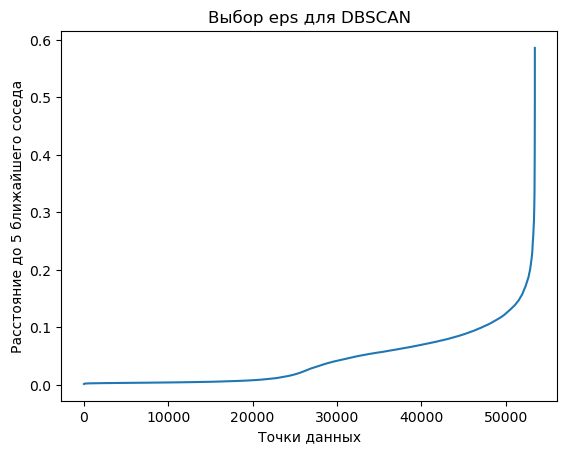

In [32]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Ищем расстояния до 5 ближайших соседей
nbrs = NearestNeighbors(n_neighbors=3, n_jobs=10).fit(X_std)
distances, _ = nbrs.kneighbors(X_std)

# Берем 5-е расстояние, сортируем и строим график
distances = np.sort(distances[:, 2])
plt.plot(distances)
plt.xlabel("Точки данных")
plt.ylabel("Расстояние до 5 ближайшего соседа")
plt.title("Выбор eps для DBSCAN")
plt.show()


In [33]:
from sklearn.cluster import DBSCAN

# Запускаем DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=3, n_jobs=10)

clusters_dbscan = dbscan.fit_predict(X_std)

In [34]:
score_dbscan = silhouette_score(X_std, clusters_dbscan)
print(f'Score DBSCAN: {score_dbscan}')

Score DBSCAN: -0.14200748137783445


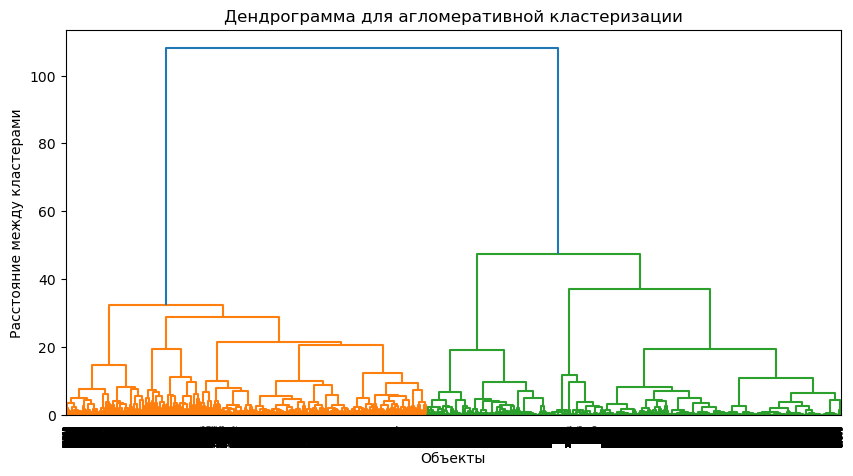

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Строим матрицу расстояний (linkage matrix)
Z = linkage(X_std, method="ward")  # Метод Уорда для минимизации дисперсии

# Строим дендрограмму
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Дендрограмма для агломеративной кластеризации")
plt.xlabel("Объекты")
plt.ylabel("Расстояние между кластерами")
plt.show()

In [ ]:
for i in [3,4,5]:
    agg_clustering = AgglomerativeClustering(n_clusters=i, linkage="ward")

    clusters_agg = agg_clustering.fit_predict(X)

    score = silhouette_score(X, clusters_agg)
    print(f'Score Agg for C={i}: {score}')


In [ ]:
data = df_filled.collect().to_pandas()
data.info()

In [ ]:
X = data.drop(columns=['subject_id'])
model = KMeans(n_clusters=3, random_state=42, n_init=10)
model.fit(X)
clusters = model.predict(X)

df_result = data
df_result['cluster'] = clusters
df_result['activityID'] = -1
unique_clusters = sorted(df_result['cluster'].unique())
print(unique_clusters)
for new_label, old_label in enumerate(unique_clusters, start=1):
    df_result.loc[df_result['cluster'] == old_label, 'activityID'] = new_label

# Создание файла submission.csv
submission = df_result[['activityID']].reset_index()
submission.columns = ['Index', 'activityID']
submission.to_csv('submission_kmean_1.csv', index=False)

In [ ]:
df_result.head()

In [ ]:
submission.head()

In [ ]:
X.describe()

In [ ]:
std = MinMaxScaler()
X_std = std.fit_transform(X)
print(X_std)

In [ ]:
model = KMeans(n_clusters=3, random_state=42, n_init=10)
model.fit(X)
clusters = model.predict(X)

df_result = data
df_result['cluster'] = clusters
df_result['activityID'] = -1
unique_clusters = sorted(df_result['cluster'].unique())
print(unique_clusters)
for new_label, old_label in enumerate(unique_clusters, start=1):
    df_result.loc[df_result['cluster'] == old_label, 'activityID'] = new_label

# Создание файла submission.csv
submission = df_result[['activityID']].reset_index()
submission.columns = ['Index', 'activityID']
submission.to_csv('submission_kmean_2.csv', index=False)

In [ ]:
df_result.head(10)

In [ ]:
df_result.corr()

In [ ]:
submission.head(10)

In [ ]:

super = pd.read_csv('submission_kmean_4.csv')
X = df_cleared.drop(columns=['subject_id'])


for i in range(1, 200):
# из преобразованного датасета удаляем идентификатор субъекта

    # инициализируем модель
    model = KMeans(n_clusters=5, random_state=i)

    # делаем кластеризацию
    clusters = model.fit_predict(X)
    # инициализируем конечный датафрейм
    df_result = pd.DataFrame()
    # добавляем колонку с кластерами
    df_result['cluster'] = clusters
    # добавляем колонку, в которую будем сохранять идентификатор активности
    df_result['activityID'] = -1

    # справочник соответствия номера кластера и идентификатора активности
    dict = {}
    # переменная для хранения идентификатора для следующей неизвестной активности
    activityID = 1

    for index, row in df_result.iterrows():
        if row['cluster'] in dict.keys():
            df_result.loc[index, 'activityID'] = dict[row['cluster']]
        else:
            dict[row['cluster']] = activityID
            df_result.loc[index, 'activityID'] = activityID
            activityID += 1

    df_result['dev'] = (df_result['activityID'] - super['activityID'])
    res = (df_result['dev'] == 0).sum()
    print(f'res for {i} = {res}')
    if res == 0:
        break